Data from https://www.kaggle.com/blastchar/telco-customer-churn

In [144]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold

%matplotlib inline

In [145]:
df = pd.read_csv("cars.csv")

In [146]:
len(df)

11914

## Initial data preparation

In [147]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [148]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [149]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [150]:
Features_Cat=['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']

In [151]:
data=df[Features_Cat]

In [152]:
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [153]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [154]:
data.head()


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [155]:
 data= data.fillna(0)

In [156]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [157]:
data.rename(columns={'msrp': 'Price'}, inplace=True)

In [158]:
Price_mean=data['Price'].mean()

In [159]:
data['above_average'] = (data['Price'] > Price_mean).astype(int)

Split the DATA

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [162]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [163]:
len(data),len(df_train),len(df_val),len(df_test)

(11914, 7148, 2383, 2383)

In [164]:
df_train.shape

(7148, 11)

In [165]:
y_train = df_train.above_average.values


In [166]:
y_val = df_val.above_average.values

In [167]:
df_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'Price', 'above_average'],
      dtype='object')

In [168]:
df_train = df_train.drop(columns=['Price','above_average'])

In [169]:
y_val = df_val.above_average.values

## Question 1

In [170]:
numerical=['year','engine_hp','highway_mpg','city_mpg']
categorical = ['make', 'model','transmission_type','vehicle_style']


In [171]:
auc = roc_auc_score(y_train, df_train['year'])

In [172]:
auc


0.6901450416005295

In [173]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

     year, 0.690
engine_hp, 0.913
highway_mpg, 0.632
 city_mpg, 0.672


## Question 2

In [174]:
columns = categorical + numerical

train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]
     

#@ INSPECTING ROC AUC SCORE:
roc_auc_score(y_val, y_pred)

0.9823130757782615

## Question 3

In [175]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [176]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores[::10]
     

,threshold,tp,fp,fn,tn
0,0.0,661,1722,0,0
10,0.1,654,354,7,1368
20,0.2,643,218,18,1504
30,0.3,622,153,39,1569
40,0.4,605,100,56,1622
50,0.5,588,76,73,1646
60,0.6,550,48,111,1674
70,0.7,498,18,163,1704
80,0.8,439,6,222,1716
90,0.9,341,2,320,1720


In [177]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)


In [178]:
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r
0,0.0,661,1722,0,0,0.277381,1.000000
10,0.1,654,354,7,1368,0.648810,0.989410
20,0.2,643,218,18,1504,0.746806,0.972769
30,0.3,622,153,39,1569,0.802581,0.940998
40,0.4,605,100,56,1622,0.858156,0.915280
50,0.5,588,76,73,1646,0.885542,0.889561
60,0.6,550,48,111,1674,0.919732,0.832073
70,0.7,498,18,163,1704,0.965116,0.753404
80,0.8,439,6,222,1716,0.986517,0.664145
90,0.9,341,2,320,1720,0.994169,0.515885


### Different Method to justify results

In [179]:
threshold = 0.5
y_pred_int = (y_pred >= threshold).astype(int)
y_pred_int

array([0, 1, 0, ..., 0, 1, 1])

In [180]:
print(classification_report(y_val,y_pred_int))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1722
           1       0.89      0.89      0.89       661

    accuracy                           0.94      2383
   macro avg       0.92      0.92      0.92      2383
weighted avg       0.94      0.94      0.94      2383



In [181]:
print(confusion_matrix(y_val,y_pred_int))

[[1646   76]
 [  73  588]]


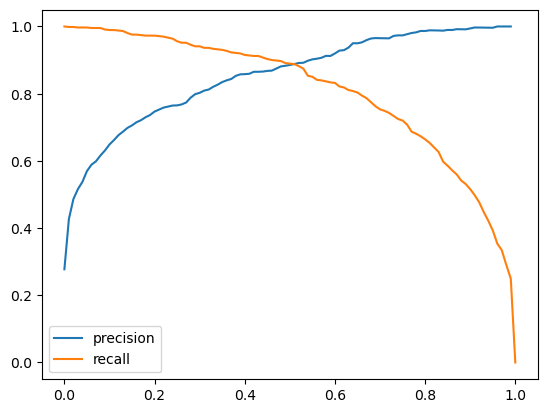

In [182]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.legend()
plt.show()

## Question 4

In [183]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

In [184]:
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r,f1
0,0.0,661,1722,0,0,0.277381,1.000000,0.434297
10,0.1,654,354,7,1368,0.648810,0.989410,0.783703
20,0.2,643,218,18,1504,0.746806,0.972769,0.844941
30,0.3,622,153,39,1569,0.802581,0.940998,0.866295
40,0.4,605,100,56,1622,0.858156,0.915280,0.885798
50,0.5,588,76,73,1646,0.885542,0.889561,0.887547
60,0.6,550,48,111,1674,0.919732,0.832073,0.873709
70,0.7,498,18,163,1704,0.965116,0.753404,0.846219
80,0.8,439,6,222,1716,0.986517,0.664145,0.793852
90,0.9,341,2,320,1720,0.994169,0.515885,0.679283


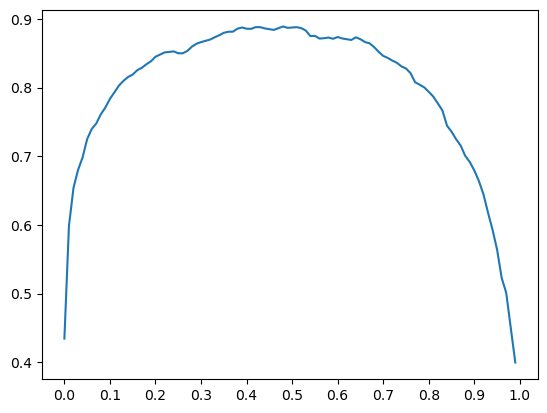

In [185]:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [186]:
df_train_full

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,Price,above_average
3181,Cadillac,CT6,2016,265.0,4.0,AUTOMATIC,Sedan,31,22,53495,1
5357,Mercedes-Benz,GLS-Class,2017,449.0,8.0,AUTOMATIC,4dr SUV,18,14,93850,1
4874,Kia,Forte,2016,173.0,4.0,AUTOMATIC,Coupe,34,25,19890,0
8102,Dodge,RAM 250,1993,180.0,6.0,MANUAL,Regular Cab Pickup,16,11,2000,0
10400,Hyundai,Tiburon,2008,172.0,6.0,AUTOMATIC,2dr Hatchback,24,17,21270,0
...,...,...,...,...,...,...,...,...,...,...,...
11284,Toyota,Venza,2014,181.0,4.0,AUTOMATIC,Wagon,26,20,27950,0
5191,Pontiac,G6,2009,219.0,6.0,AUTOMATIC,Sedan,26,17,24710,0
5390,Volkswagen,Golf GTI,2016,220.0,4.0,AUTOMATED_MANUAL,2dr Hatchback,33,25,27590,0
860,Saab,9-5,2009,260.0,4.0,AUTOMATIC,Wagon,27,17,43270,1


## Question 5 

In [187]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [190]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.above_average
    y_val = df_val.above_average

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.981 +- 0.003


## Question 6

In [194]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.950 +- 0.006
C= 0.1, 0.969 +- 0.005
C= 0.5, 0.978 +- 0.002
C=  10, 0.982 +- 0.002
